In [2]:
# set project root to correct path
import sys
import os

proj_path = '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode'
if proj_path not in sys.path:
  sys.path.append(proj_path)

from set_path import set_path
set_path()

print(sys.path)
print(os.getcwd())

setting cwd to '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation'
['/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode/jupyter', '/home/payam/miniconda3/envs/tf2-gpu/lib/python39.zip', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9/lib-dynload', '', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9/site-packages', '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode']
/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from loader.mimic_cxr_jpg_loader import MIMIC_CXR_JPG_Loader
from utils.augmentation import preprocess_image

BATCH_SIZE = 5

def _preprocess(x, y, info=None):
    out = {}
    x = preprocess_image(x, 448, 448, is_training=False, color_distort=False, crop='Center')
    x = tf.image.convert_image_dtype(x, dtype=tf.uint8)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    out['image'] = x
    out['label'] = y
    out['info'] = info
    return out


In [23]:
myCustomDataLoader = MIMIC_CXR_JPG_Loader({'train': 100, 'validate': 100, 'test': 100}, proj_path + '/..')
train_tfds, val_tfds, test_tfds = myCustomDataLoader.load()
class_names = myCustomDataLoader.info()['class_names']
print(myCustomDataLoader.metadata)

{'num_classes': 9, 'class_names': array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Pleural Effusion', 'Pneumonia', 'Pneumothorax', 'Fracture',
       'Support Devices'], dtype='<U16'), 'all_data_size': 377110, 'split_size': {'train': 100, 'validate': 100, 'test': 100}}


In [12]:
for f, l, info in train_tfds.take(1):
    print('max value before preprocess',tf.reduce_max(f))
    print('min value before preprocess',tf.reduce_min(f))
    print("Shape of image batch:", f.shape.as_list())
    print("Shape of labels batch:", l.shape.as_list())

max value before preprocess tf.Tensor(1.0, shape=(), dtype=float32)
min value before preprocess tf.Tensor(0.0, shape=(), dtype=float32)
Shape of image batch: [2140, 1760, 3]
Shape of labels batch: [9]


In [27]:
# TEST 1: ------- Test Train dataset -------
batched_tfds = train_tfds.map(_preprocess).batch(BATCH_SIZE)

In [ ]:
# TEST 2: ------- Test Validation dataset -------
batched_tfds = val_tfds.shuffle(buffer_size=2*BATCH_SIZE).map(_preprocess).batch(BATCH_SIZE)

In [10]:
# TEST 3: ------- Test dataset filtering -------
filtered_train_tfds, filtered_val_tfds, filtered_test_tfds = myCustomDataLoader.load(['frontal_view', 'has_label', 'unambiguous_label'])
batched_tfds = filtered_train_tfds.shuffle(buffer_size=2*BATCH_SIZE).map(_preprocess).batch(BATCH_SIZE)

In [25]:
for item in batched_tfds.take(1):
    f = item['image']
    l = item['label']
    print('max value after preprocess',tf.reduce_max(f))
    print('min value after preprocess',tf.reduce_min(f))
    print("Shape of image batch:", f.shape.as_list())
    print("Shape of labels batch:", l.shape.as_list())

max value after preprocess tf.Tensor(255, shape=(), dtype=uint8)
min value after preprocess tf.Tensor(0, shape=(), dtype=uint8)
Shape of image batch: [5, 448, 448, 3]
Shape of labels batch: [5, 9]


In [28]:
for item in batched_tfds.take(1):
    f_resnte = item['image']
    l = item['label']
    print('max value after preprocess',tf.reduce_max(f_resnte))
    print('min value after preprocess',tf.reduce_min(f))
    print("Shape of image batch:", f.shape.as_list())
    print("Shape of labels batch:", l.shape.as_list())

max value after preprocess tf.Tensor(255, shape=(), dtype=uint8)
min value after preprocess tf.Tensor(0, shape=(), dtype=uint8)
Shape of image batch: [5, 448, 448, 3]
Shape of labels batch: [5, 9]


In [30]:
print('f',f[1,1,:])
print('f_resnte',f_resnte[1,1,:])

f tf.Tensor(
[[13 13 13]
 [13 13 13]
 [13 13 13]
 ...
 [ 3  3  3]
 [ 3  3  3]
 [ 2  2  2]], shape=(448, 3), dtype=uint8)
f_resnte tf.Tensor(
[[166 153 146]
 [166 153 146]
 [166 153 146]
 ...
 [156 143 136]
 [156 143 136]
 [155 142 135]], shape=(448, 3), dtype=uint8)


: 

In [29]:
is_bgr = tf.reduce_all(tf.equal(f[..., ::-1], f_resnte)).numpy()

if is_bgr:
    print("The image has been converted to BGR format.")
else:
    print("The image is still in RGB format.")

The image is still in RGB format.


**** has ambiguous label


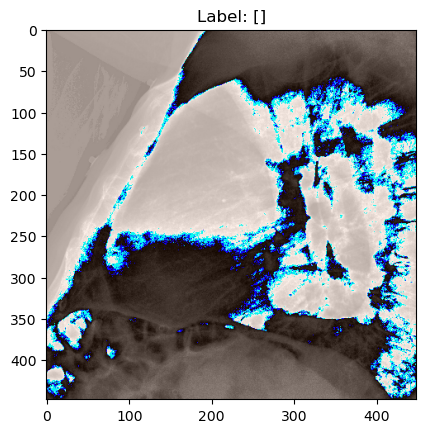

patient ^: {'subject_id': b'16522952', 'study_id': b'50740255', 'dicom_id': b'37ddc5f9-05ccc32f-1892009b-abe07796-6d6b4e59'}




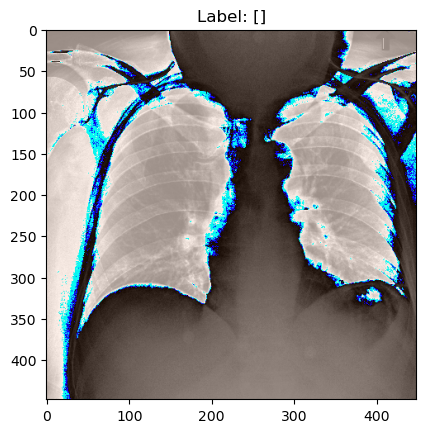

patient ^: {'subject_id': b'16403314', 'study_id': b'52040222', 'dicom_id': b'8002f7f5-0afbc292-4c0d7cd6-2d367e09-3cab5800'}




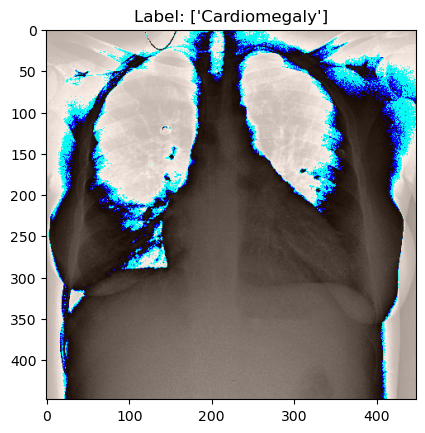

patient ^: {'subject_id': b'15014156', 'study_id': b'58039672', 'dicom_id': b'5b3af28f-68618beb-187afb4a-1e5ce166-62c1404d'}




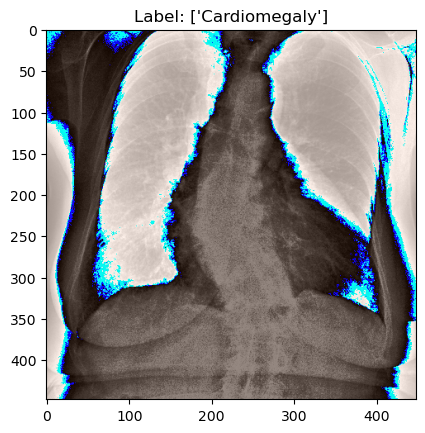

patient ^: {'subject_id': b'15009233', 'study_id': b'54618867', 'dicom_id': b'830673d1-cfeba2b3-e4dd048f-4b7b7676-6570cf98'}




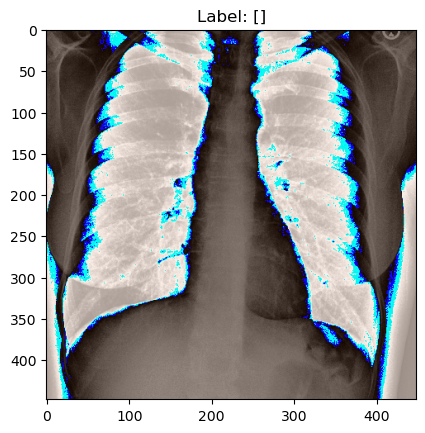

patient ^: {'subject_id': b'18430568', 'study_id': b'59496683', 'dicom_id': b'52539393-cb6de385-ac4cebc0-5282f41d-1e752cd9'}




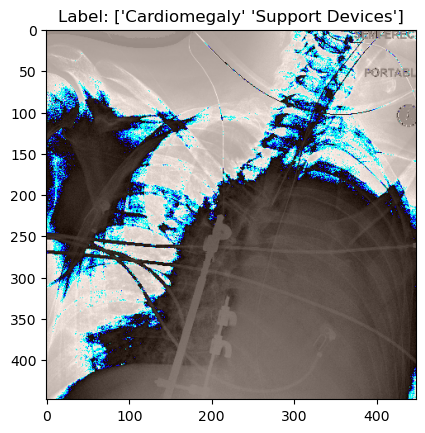

patient ^: {'subject_id': b'16203142', 'study_id': b'50157211', 'dicom_id': b'46072879-8816f708-6feb19df-89b23a57-c75b38df'}




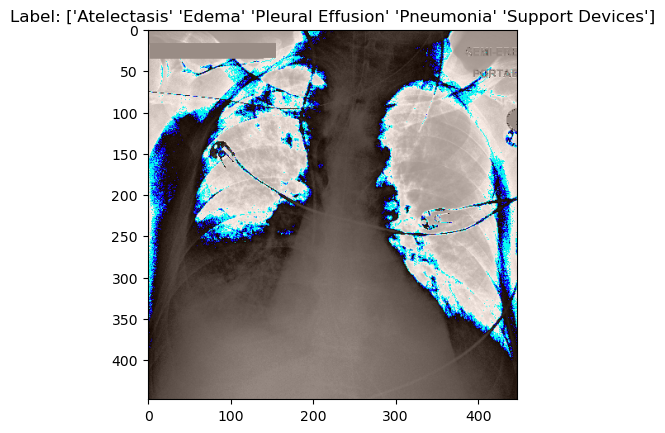

patient ^: {'subject_id': b'13611526', 'study_id': b'59990335', 'dicom_id': b'fc69aa27-504a1260-dbb6fdef-98648e8e-bf572519'}




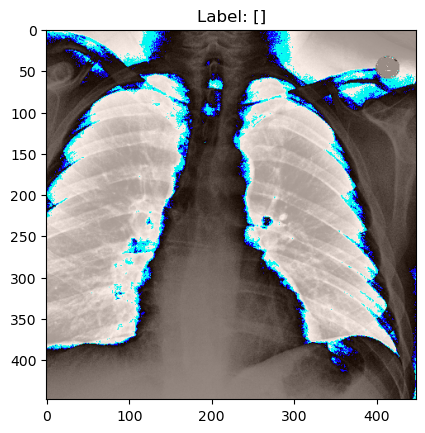

patient ^: {'subject_id': b'14397935', 'study_id': b'52486647', 'dicom_id': b'50dcd10f-dae76be0-c0cececf-51760f5a-a34e44ca'}




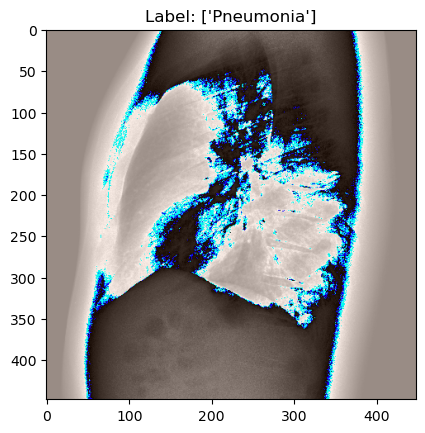

patient ^: {'subject_id': b'16811979', 'study_id': b'53671860', 'dicom_id': b'79e3c855-076bdd90-ea6448fe-a49df7e6-819b0d9b'}




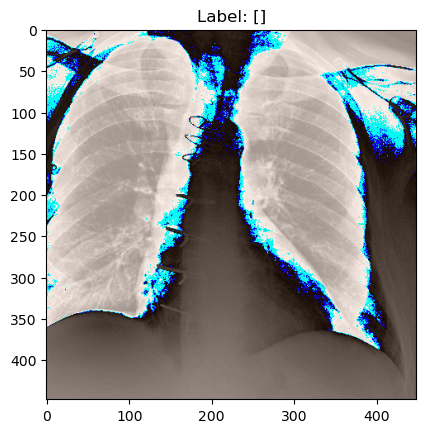

patient ^: {'subject_id': b'19780933', 'study_id': b'52632163', 'dicom_id': b'1e692140-db6fb413-2fa719f2-b9baa533-40f21b32'}




In [9]:
# Visualize the images and labels for 1 batch

for batch in batched_tfds.take(2):
    for i in range(len(batch['image'])):
        image = batch['image'][i]
        if -1 in batch['label'][i]:
            print('**** has ambiguous label')
        label_idx = np.where(batch['label'][i] == 1)
        labels = class_names[label_idx]
        info = batch['info'][i].numpy()
        info_dict = {'subject_id': info[0], 'study_id': info[1], 'dicom_id': info[2]}

        # Display the image, label, and info
        plt.imshow(image, cmap='gray')  # Assuming grayscale images
        plt.title(f"Label: {labels}")
        plt.show()
        print('patient ^:', info_dict)
        print('\n')


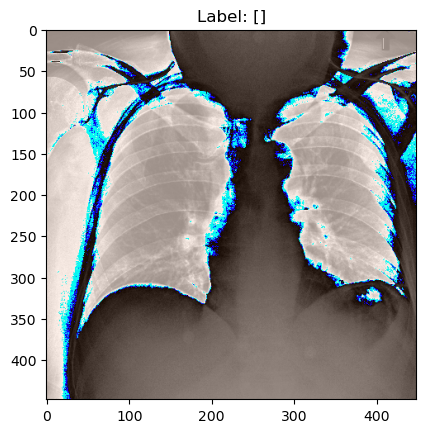

patient ^: {'subject_id': b'16403314', 'study_id': b'52040222', 'dicom_id': b'8002f7f5-0afbc292-4c0d7cd6-2d367e09-3cab5800'}




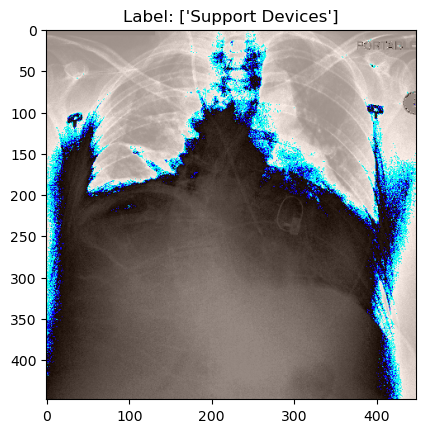

patient ^: {'subject_id': b'19631417', 'study_id': b'57519417', 'dicom_id': b'81562165-d9b54bf7-d9c18f74-a6dcce5b-652c9940'}




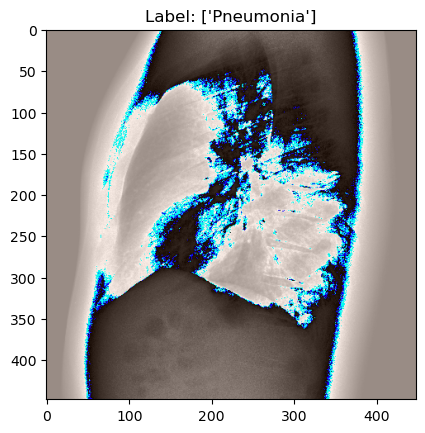

patient ^: {'subject_id': b'16811979', 'study_id': b'53671860', 'dicom_id': b'79e3c855-076bdd90-ea6448fe-a49df7e6-819b0d9b'}




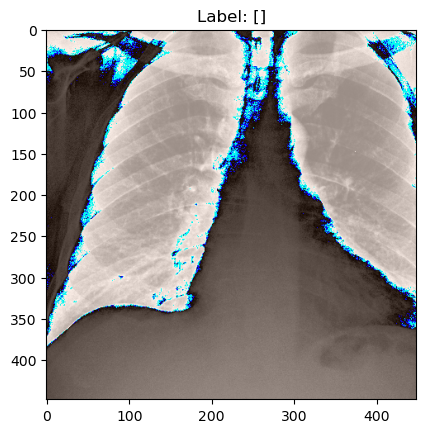

patient ^: {'subject_id': b'13040858', 'study_id': b'58103787', 'dicom_id': b'7f24b0e2-0116a559-14268420-1f924082-0e76bddc'}




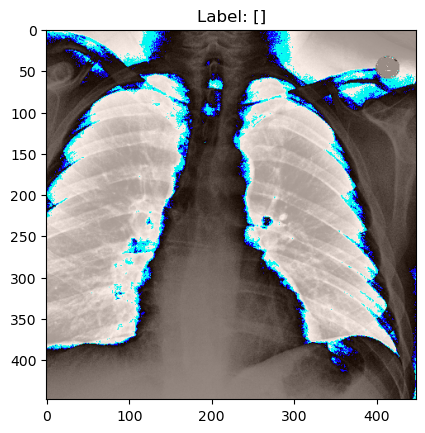

patient ^: {'subject_id': b'14397935', 'study_id': b'52486647', 'dicom_id': b'50dcd10f-dae76be0-c0cececf-51760f5a-a34e44ca'}




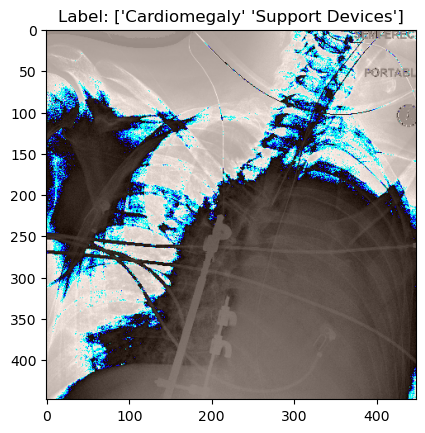

patient ^: {'subject_id': b'16203142', 'study_id': b'50157211', 'dicom_id': b'46072879-8816f708-6feb19df-89b23a57-c75b38df'}




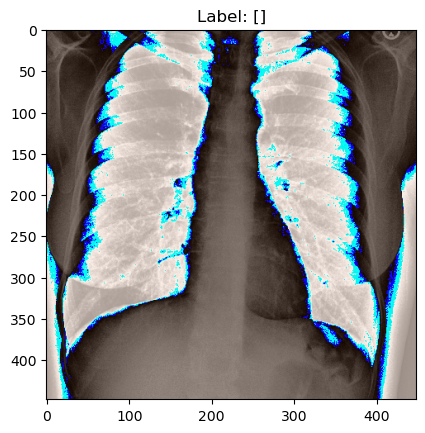

patient ^: {'subject_id': b'18430568', 'study_id': b'59496683', 'dicom_id': b'52539393-cb6de385-ac4cebc0-5282f41d-1e752cd9'}


**** has ambiguous label


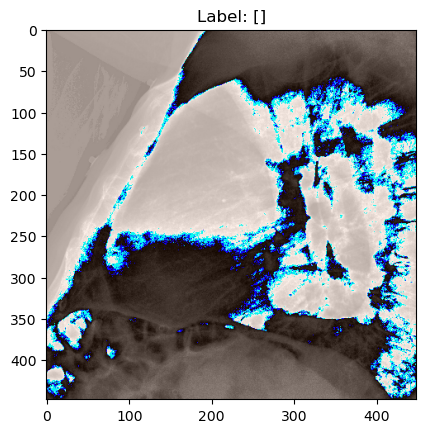

patient ^: {'subject_id': b'16522952', 'study_id': b'50740255', 'dicom_id': b'37ddc5f9-05ccc32f-1892009b-abe07796-6d6b4e59'}




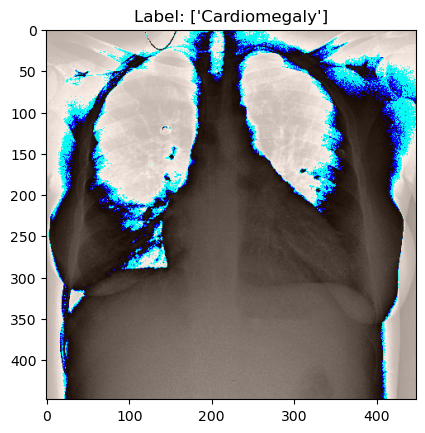

patient ^: {'subject_id': b'15014156', 'study_id': b'58039672', 'dicom_id': b'5b3af28f-68618beb-187afb4a-1e5ce166-62c1404d'}




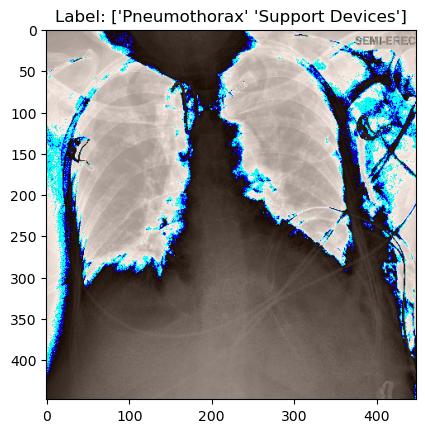

patient ^: {'subject_id': b'18295542', 'study_id': b'57412568', 'dicom_id': b'a62581a3-e82d67d5-6a05b4e2-6fed3fd7-41ac52e2'}




In [18]:
# Visualize the images and labels for 1 batch

for batch in batched_tfds.take(2):
    for i in range(len(batch['image'])):
        image = batch['image'][i]
        if -1 in batch['label'][i]:
            print('**** has ambiguous label')
        label_idx = np.where(batch['label'][i] == 1)
        labels = class_names[label_idx]
        info = batch['info'][i].numpy()
        info_dict = {'subject_id': info[0], 'study_id': info[1], 'dicom_id': info[2]}

        # Display the image, label, and info
        plt.imshow(image, cmap='gray')  # Assuming grayscale images
        plt.title(f"Label: {labels}")
        plt.show()
        print('patient ^:', info_dict)
        print('\n')

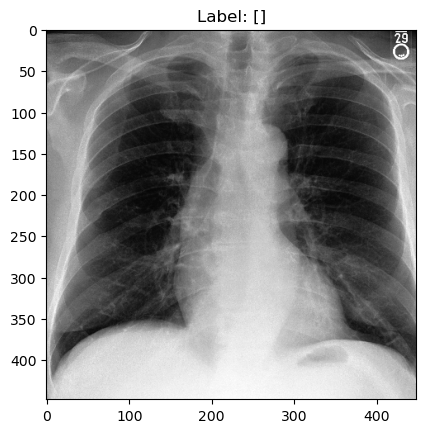

patient ^: {'subject_id': b'10743678', 'study_id': b'54525833', 'dicom_id': b'22e0058d-bd2a4da7-5b14a40b-7b4f97b6-1739ba8e'}


**** has ambiguous label


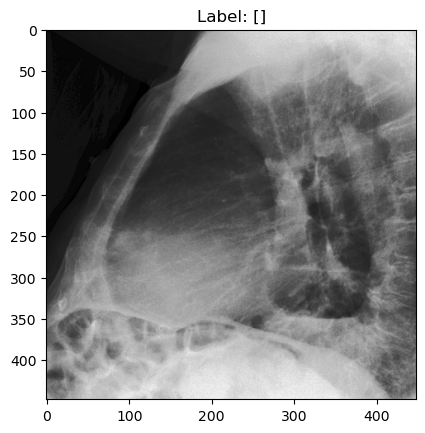

patient ^: {'subject_id': b'16522952', 'study_id': b'50740255', 'dicom_id': b'37ddc5f9-05ccc32f-1892009b-abe07796-6d6b4e59'}




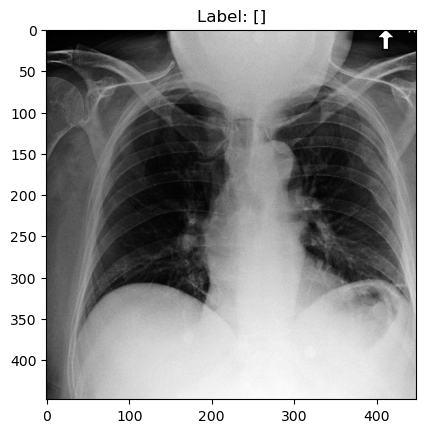

patient ^: {'subject_id': b'16403314', 'study_id': b'52040222', 'dicom_id': b'8002f7f5-0afbc292-4c0d7cd6-2d367e09-3cab5800'}




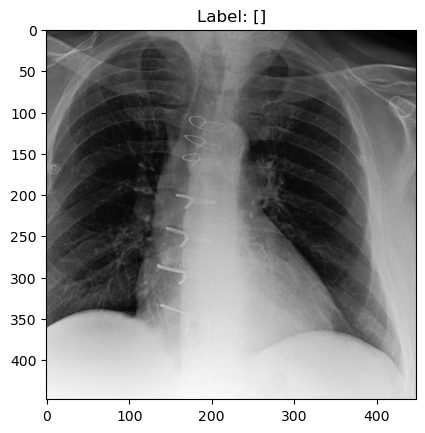

patient ^: {'subject_id': b'19780933', 'study_id': b'52632163', 'dicom_id': b'1e692140-db6fb413-2fa719f2-b9baa533-40f21b32'}




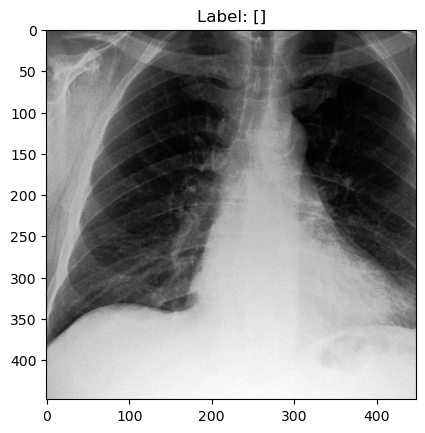

patient ^: {'subject_id': b'13040858', 'study_id': b'58103787', 'dicom_id': b'7f24b0e2-0116a559-14268420-1f924082-0e76bddc'}




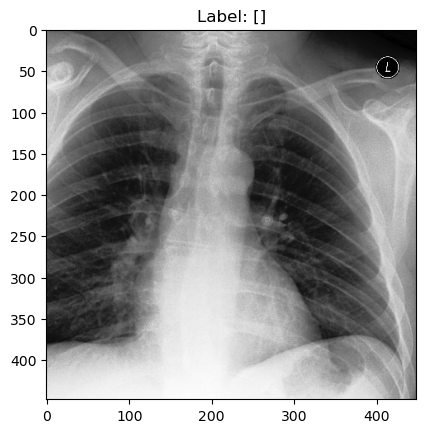

patient ^: {'subject_id': b'14397935', 'study_id': b'52486647', 'dicom_id': b'50dcd10f-dae76be0-c0cececf-51760f5a-a34e44ca'}




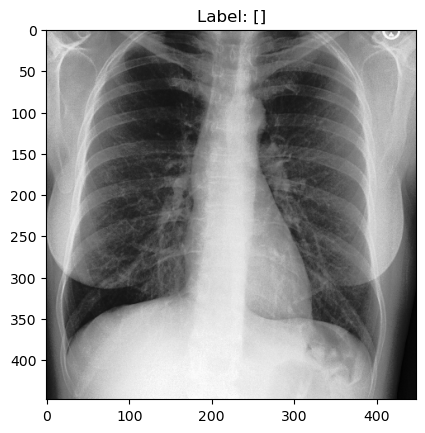

patient ^: {'subject_id': b'18430568', 'study_id': b'59496683', 'dicom_id': b'52539393-cb6de385-ac4cebc0-5282f41d-1e752cd9'}


**** has ambiguous label


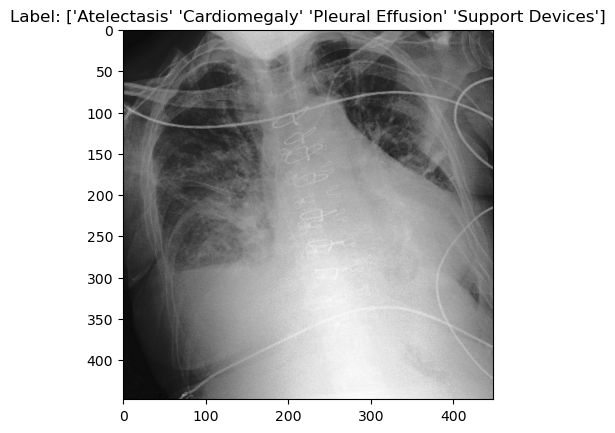

patient ^: {'subject_id': b'11985034', 'study_id': b'58517602', 'dicom_id': b'0b4b2e43-7fffd2cc-383f00a9-5a7c8d8c-62b9cbed'}




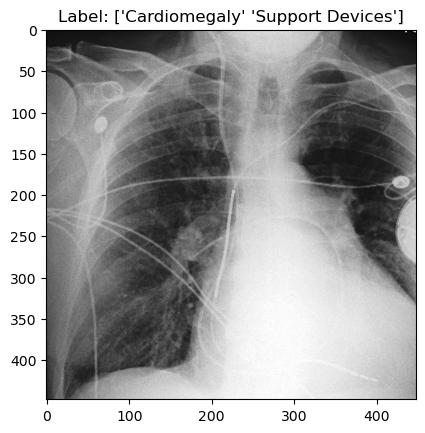

patient ^: {'subject_id': b'18995174', 'study_id': b'50818159', 'dicom_id': b'86da85f4-13684538-5591e53c-1a18c965-cdcff6c0'}




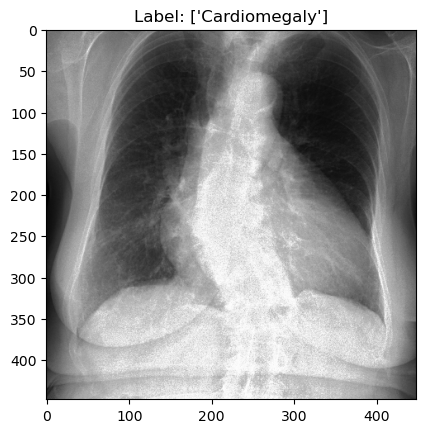

patient ^: {'subject_id': b'15009233', 'study_id': b'54618867', 'dicom_id': b'830673d1-cfeba2b3-e4dd048f-4b7b7676-6570cf98'}




In [15]:
# Visualize the images and labels for 1 batch

for batch in batched_tfds.take(2):
    for i in range(len(batch['image'])):
        image = batch['image'][i]
        if -1 in batch['label'][i]:
            print('**** has ambiguous label')
        label_idx = np.where(batch['label'][i] == 1)
        labels = class_names[label_idx]
        info = batch['info'][i].numpy()
        info_dict = {'subject_id': info[0], 'study_id': info[1], 'dicom_id': info[2]}

        # Display the image, label, and info
        plt.imshow(image, cmap='gray')  # Assuming grayscale images
        plt.title(f"Label: {labels}")
        plt.show()
        print('patient ^:', info_dict)
        print('\n')